In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os

import sys
sys.path.append('../src')
from preprocessing import get_more_info, get_df_date_amt, process_credit_data, load_payments_from_zip


In [3]:
df = load_payments_from_zip('../data/CHI-credit.zip')
df.head()

available files:
payments.csv
socrata_metadata.json
----


,VOUCHER NUMBER,AMOUNT,CHECK DATE,DEPARTMENT NAME,CONTRACT NUMBER,VENDOR NAME,CASHED
0,PV99189986031,50.00,2018-04-06,NaN,DV,"HATCHETT, SYDELL",True
1,PVRF182700008,29.14,2018-09-05,NaN,DV,NOEMI GALVEZ-DELIRA,True
2,PVRF182700007,29.14,2018-09-04,NaN,DV,ANTONIO REED,True
3,PVCI19CI500124,137607.50,2019-03-11,DEPT OF BUSINESS & INFORMATION SERVICES,32678,CARMINATI CONSULTING,True
4,PV991999612973,43878.68,2019-03-05,NaN,DV,RUSH SURGICENTER LTD,True


In [3]:
get_more_info(df)

Dataset Size: 829738
Duplicate rows: 52529
----
Column Level Data:
----
VOUCHER NUMBER:
    Nulls = 153390 (18.49%)
    Unique = 246578
AMOUNT:
    Nulls = 0 (0.0%)
    Unique = 217511
CHECK DATE:
    Nulls = 0 (0.0%)
    Unique = 501
DEPARTMENT NAME:
    Nulls = 648256 (78.13%)
    Unique = 53
CONTRACT NUMBER:
    Nulls = 0 (0.0%)
    Unique = 75303
VENDOR NAME:
    Nulls = 10 (0.0%)
    Unique = 342347
CASHED:
    Nulls = 13992 (1.69%)
    Unique = 2


In [4]:
clean = process_credit_data(df)
clean.head()

Removing dupes...
Breaking down dates...
Encoding columns...
Sorting transactions...
Finalizing data...


,amount,month,day,year,weekday,voucher,contract,vendid,cashed_flag,dept_administrative_adjudication,...,dept_office_of_cable_communication_adm,dept_office_of_compliance,dept_office_of_emergency_communication,dept_office_of_inspector_general,dept_office_of_special_events,dept_office_of_the_mayor,dept_ohare_modernization_project,dept_planning_&_development,dept_police_board,dept_unknown
0,270.00,1,2,2018,1,106161.0,61468.0,312479.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1,15426.00,1,2,2018,1,2130.0,15524.0,127781.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,170.19,1,2,2018,1,48176.0,61468.0,317211.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,4360.12,1,2,2018,1,379.0,15366.0,107242.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3407.54,1,2,2018,1,2009.0,14768.0,257458.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
get_more_info(clean, False)

Dataset Size: 619120
Duplicate rows: 0
----


#### Save Cleaned Data

In [16]:
# save cleaned data
save_path = '../data/clean-credit.pkl'
if os.path.isfile(save_path):
    print(f'File Already Exists -- {save_path}')
    pass
else:
    pd.to_pickle(clean, save_path)

File Already Exists


----
## EDA
----

In [5]:
ts = get_df_date_amt(df)

        date     amount
0 2002-01-01   56222.15
1 2002-01-01    4200.00
2 2002-01-01  399490.61


In [16]:
# Group transactions by day and remove data before 2018

grp_1 = ts.groupby('date')['amount'].agg(['sum', 'count'])
grp_ts = grp_1[grp_1.index >= '2018-01-01']
grp_ts.head(3)

,sum,count
date,,
2018-01-02,7473331.35,221
2018-01-03,15574806.18,94
2018-01-04,11314489.48,346
2018-01-05,11400727.89,434
2018-01-08,21200143.87,513
...,...,...
2019-11-26,10415309.94,654
2019-11-27,37388775.61,410
2019-11-29,51242067.67,440


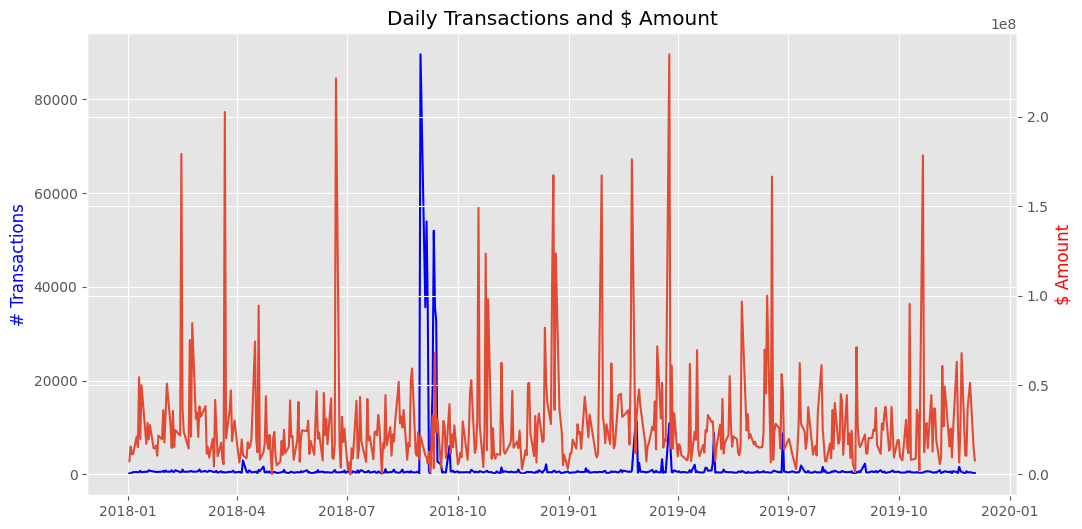

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(grp_ts['count'], color='b')
ax1.set_ylabel('# Transactions', color='b')
ax2.plot(grp_ts['sum'])
ax2.set_ylabel('$ Amount', color='r')

ax1.set_title('Daily Transactions and Amount')

plt.show()